In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from calendar import monthrange
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Loading dataset

In [2]:
train = pd.read_csv('../data/Train.csv')
test = pd.read_csv('../data/Test.csv')

print('Train shape', train.shape)
print('Test shape', test.shape)

Train shape (31647, 18)
Test shape (13564, 17)


In [3]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [4]:
# checking null values
print('missing values in train')
print(train.isna().sum())

print('missing values in test')
print(test.isna().sum())

missing values in train
id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
missing values in test
id                                      0
customer_age                          270
job_type                                0
marital                                81
education       

In [5]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,31647,31647,id_16232,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,31028.0,NaN,NaN,NaN,40.439216,10.751392,18.0,32.0,39.0,48.0,97.0
job_type,31647,12,blue-collar,6816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,31497,3,married,18945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,31647,4,secondary,16247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,31647,2,no,31094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,31248.0,NaN,NaN,NaN,1368.112615,3085.342417,-8020.0,72.0,449.0,1413.0,102128.0
housing_loan,31647,2,yes,17700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_loan,31498,2,no,26463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
communication_type,31647,3,cellular,20480,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,13564,13564,id_34685,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,13294.0,NaN,NaN,NaN,40.450429,10.747881,18.0,32.0,39.0,48.0,94.0
job_type,13564,12,blue-collar,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,13483,3,married,8123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,13564,4,secondary,6955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,13564,2,no,13302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,13383.0,NaN,NaN,NaN,1341.405514,2839.67099,-6849.0,70.5,447.0,1466.0,71187.0
housing_loan,13564,2,yes,7430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_loan,13490,2,no,11314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
communication_type,13564,3,cellular,8805,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing data - Imputation and removal

In [7]:
def hist_box_col(series):
    fig, ax = plt.subplots(2, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
    ax[0].boxplot(series, vert=False)
    ax[1].hist(series)
    plt.show()
    
def bar_col(series):
    plt.figure(figsize=(6,6))
    s_counts = series.value_counts()
    plt.bar(s_counts.index, s_counts)
    plt.show()

**Customer Age**

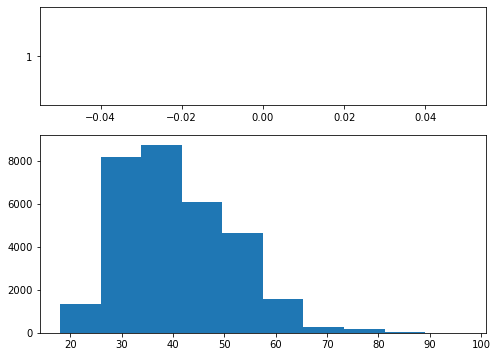

In [8]:
hist_box_col(train['customer_age'])

In [9]:
# checking unique customer if possible to impute or not
if train['id'].nunique() == len(train):
    print('Each entry is unique customer and so age cant be identified from other entries ')

Each entry is unique customer and so age cant be identified from other entries 


In [10]:
# null values if entries with negative age are removed
train = train[~train['customer_age'].isna()]
print(train.isna().sum())

test = test[~test['customer_age'].isna()]
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                               146
education                               0
default                                 0
balance                               391
housing_loan                            0
personal_loan                         146
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 303
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25315
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                80
education                               0
default              

Removing the members where customer age is not available as there are just 2% such entries in both train and test

**Marital status**

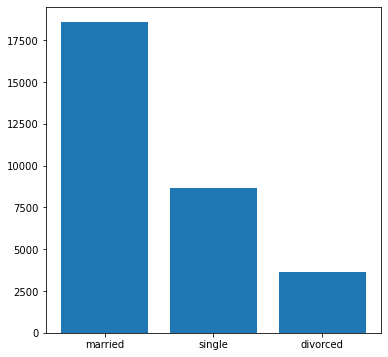

In [11]:
bar_col(train['marital'])

In [12]:
# refs - https://docs.1010data.com/Tutorials/MachineLearningExamples/BankMarketingDataSet_2.html
# based on the ref we will replace nans with unknown
train.loc[train['marital'].isna(), 'marital'] = 'unknown'
test.loc[test['marital'].isna(), 'marital'] = 'unknown'

**Balance**

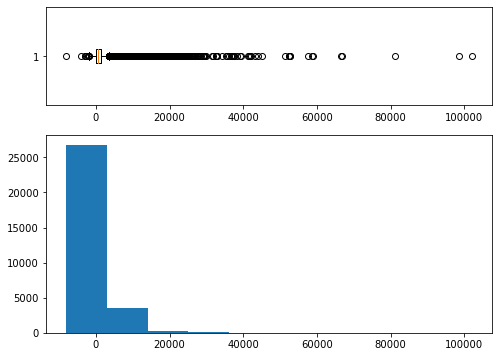

In [13]:
hist_box_col(train.loc[~train['balance'].isna(), 'balance'])

In [14]:
# null values if entries with negative age are removed
train = train[~train['balance'].isna()]
print(train.isna().sum())

test = test[~test['balance'].isna()]
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                         146
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 296
num_contacts_in_campaign              111
days_since_prev_campaign_contact    24997
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Removing the members where balance is not available as there are just 1% such entries in both train and test

**Personal Loan**

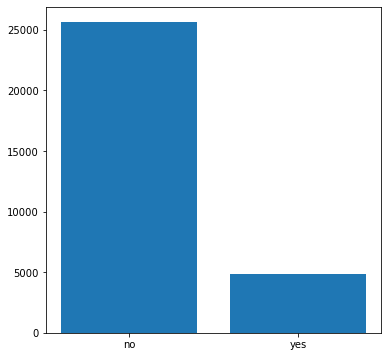

In [15]:
bar_col(train['personal_loan'])

In [16]:
# null values if entries with negative age are removed
train = train[~train['personal_loan'].isna()]
print(train.isna().sum())

test = test[~test['personal_loan'].isna()]
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 293
num_contacts_in_campaign              111
days_since_prev_campaign_contact    24877
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Removing the members where personal loan info is not available as there are less than 1% such entries in both train and test

**Last contact duration**

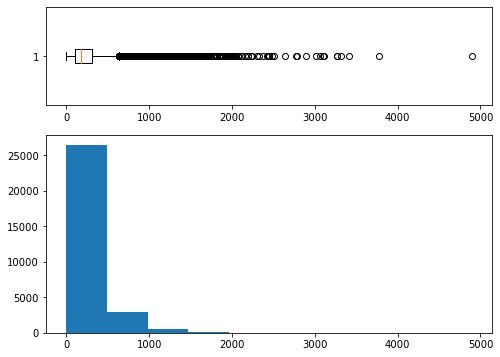

In [17]:
hist_box_col(train.loc[~train['last_contact_duration'].isna(), 'last_contact_duration'])

In [18]:
train['last_contact_duration'].describe(percentiles=[x/10 for x in range(10)])

count    30198.000000
mean       256.424531
std        256.806349
min          0.000000
0%           0.000000
10%         57.000000
20%         88.000000
30%        117.000000
40%        146.000000
50%        180.000000
60%        221.000000
70%        277.000000
80%        365.000000
90%        546.000000
max       4900.000000
Name: last_contact_duration, dtype: float64

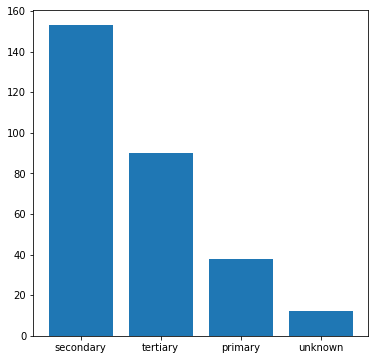

In [19]:
bar_col(train.loc[train['last_contact_duration'].isna(), 'education'])

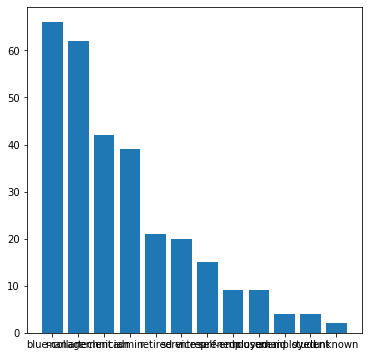

In [20]:
bar_col(train.loc[train['last_contact_duration'].isna(), 'job_type'])

In [21]:
train.loc[train['last_contact_duration'].isna(), 'last_contact_duration'] = np.nanpercentile(train['last_contact_duration'], 0.5)
print(train.isna().sum())

test.loc[test['last_contact_duration'].isna(), 'last_contact_duration'] = np.nanpercentile(test['last_contact_duration'], 0.5)
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign              111
days_since_prev_campaign_contact    24877
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Taking median as the value to impute for missing last contant duration column

**Number of contacts in the campaign**

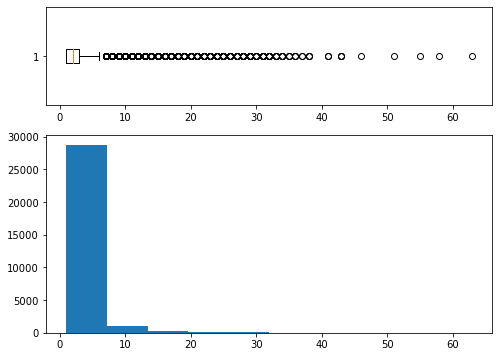

In [22]:
hist_box_col(train.loc[~train['num_contacts_in_campaign'].isna(), 'num_contacts_in_campaign'])

In [23]:
train.loc[train['num_contacts_in_campaign'].isna(), 'num_contacts_in_campaign'] = np.nanpercentile(train['num_contacts_in_campaign'], 0.5)
print(train.isna().sum())

test.loc[test['num_contacts_in_campaign'].isna(), 'num_contacts_in_campaign'] = np.nanpercentile(test['num_contacts_in_campaign'], 0.5)
print(test.isna().sum())

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact    24877
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default              

Taking median as the value to impute for missing numbers of contacts in campaign column

**Days since previous campaign contact**

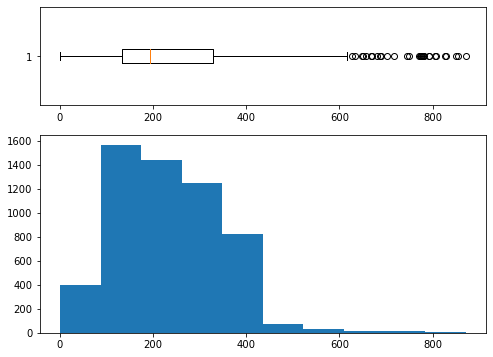

In [24]:
hist_box_col(train.loc[~train['days_since_prev_campaign_contact'].isna(), 'days_since_prev_campaign_contact'])

In [25]:
train['days_since_prev_campaign_contact'].describe(percentiles=[x/10 for x in range(10)])

count    5614.000000
mean      225.230495
std       115.290350
min         1.000000
0%          1.000000
10%        91.000000
20%       108.000000
30%       161.000000
40%       181.000000
50%       195.000000
60%       259.000000
70%       301.000000
80%       343.000000
90%       363.000000
max       871.000000
Name: days_since_prev_campaign_contact, dtype: float64

In [26]:
train.loc[~train['days_since_prev_campaign_contact'].isna()]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
10,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19,nov,1195.0,3.0,160.0,1,failure,0
13,id_43255,50.0,management,married,secondary,no,4873.0,no,no,telephone,6,feb,381.0,6.0,213.0,9,failure,0
15,id_12246,42.0,management,married,tertiary,no,55.0,yes,no,cellular,17,nov,57.0,1.0,126.0,3,failure,0
17,id_31616,41.0,technician,married,secondary,no,-3.0,yes,no,cellular,16,apr,138.0,1.0,300.0,1,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31629,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,2,jul,141.0,1.0,91.0,6,failure,0
31636,id_24068,45.0,services,divorced,primary,no,92.0,yes,no,cellular,17,apr,463.0,2.0,339.0,1,failure,0
31640,id_41466,51.0,management,single,tertiary,no,298.0,yes,no,cellular,15,may,432.0,4.0,375.0,1,failure,1
31641,id_31483,26.0,technician,single,secondary,no,459.0,no,no,cellular,29,jan,237.0,1.0,182.0,8,other,0


In [27]:
train['prev_campaign_contact'] = np.where(train['days_since_prev_campaign_contact'].isna(), 'no', 'yes')
train.drop('days_since_prev_campaign_contact', axis=1, inplace=True)

test['prev_campaign_contact'] = np.where(test['days_since_prev_campaign_contact'].isna(), 'no', 'yes')
test.drop('days_since_prev_campaign_contact', axis=1, inplace=True)

In [28]:
print(train.isna().sum())

print(test.isna().sum())

id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
prev_campaign_contact         0
dtype: int64
id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration      

Since days since previous contact is not present is 90%+ data we will create additional column as an indicator column whether the customer was previously contacted or not.

In [29]:
assert train.isna().sum().sum() == 0
print('train size', len(train))

assert test.isna().sum().sum() == 0
print('test size', len(test))

train size 30491
test size 13043


### Outlier detection and removal

In [30]:
train.dtypes

id                             object
customer_age                  float64
job_type                       object
marital                        object
education                      object
default                        object
balance                       float64
housing_loan                   object
personal_loan                  object
communication_type             object
day_of_month                    int64
month                          object
last_contact_duration         float64
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome          object
term_deposit_subscribed         int64
prev_campaign_contact          object
dtype: object

Plotting for columns customer_age


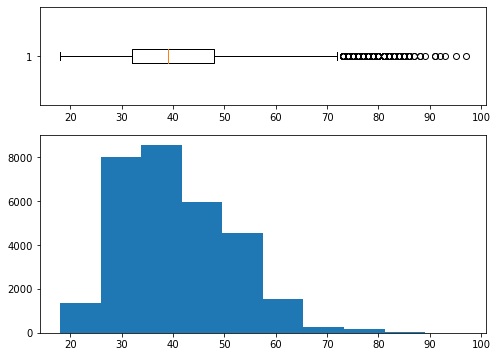

Plotting for columns job_type


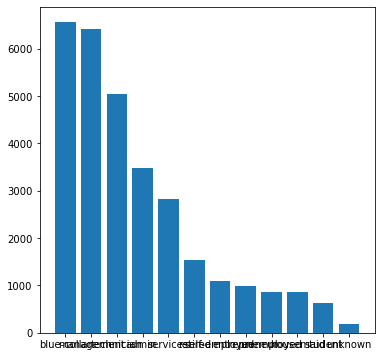

Plotting for columns marital


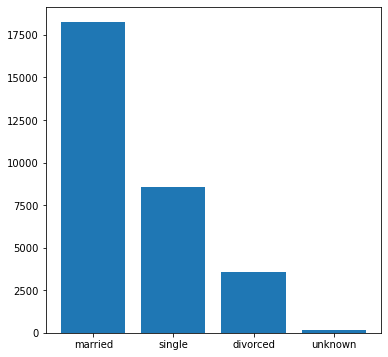

Plotting for columns education


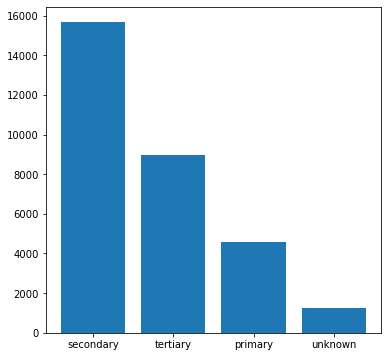

Plotting for columns default


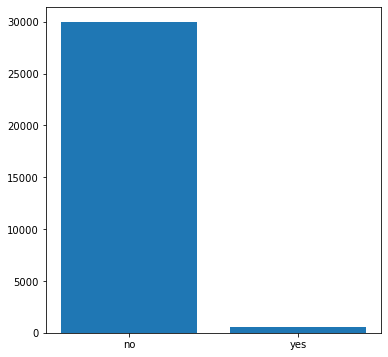

Plotting for columns balance


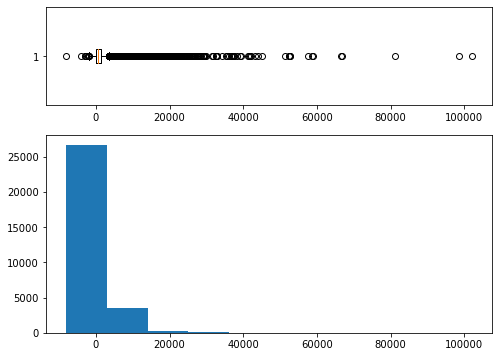

Plotting for columns housing_loan


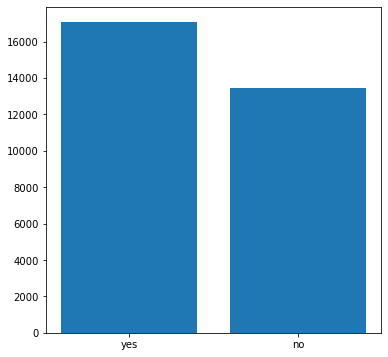

Plotting for columns personal_loan


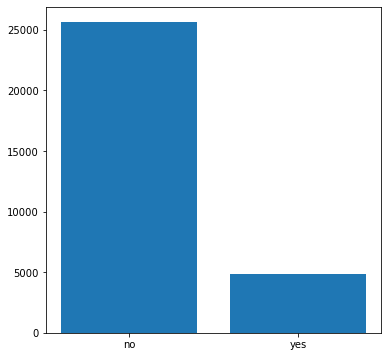

Plotting for columns communication_type


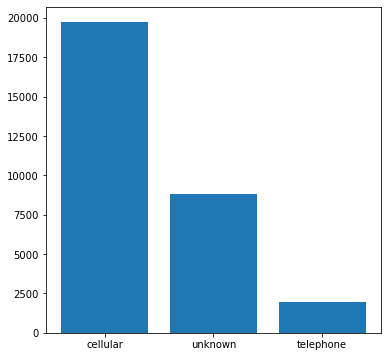

Plotting for columns day_of_month


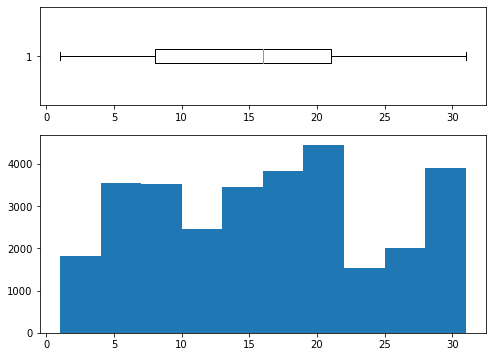

Plotting for columns month


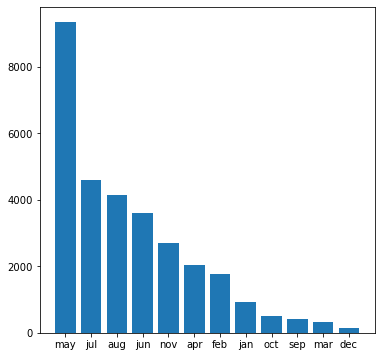

Plotting for columns last_contact_duration


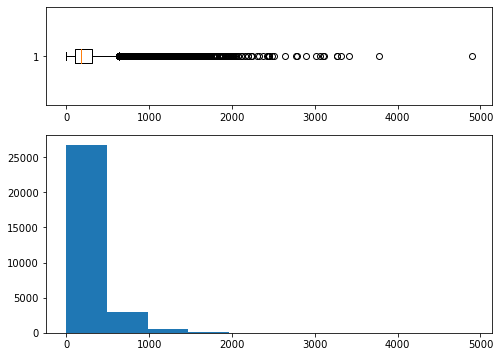

Plotting for columns num_contacts_in_campaign


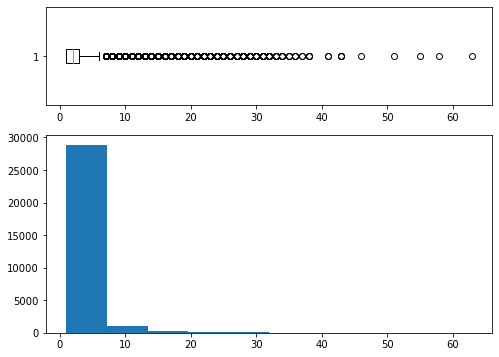

Plotting for columns num_contacts_prev_campaign


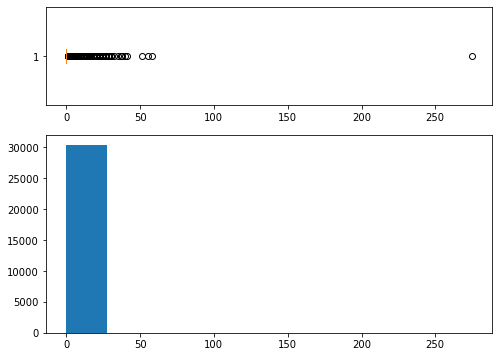

Plotting for columns prev_campaign_outcome


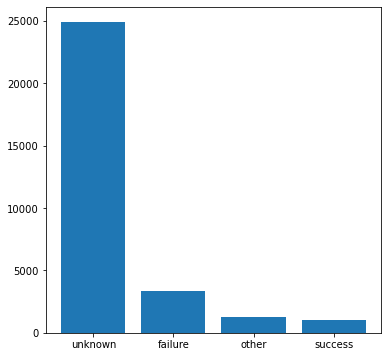

Plotting for columns term_deposit_subscribed


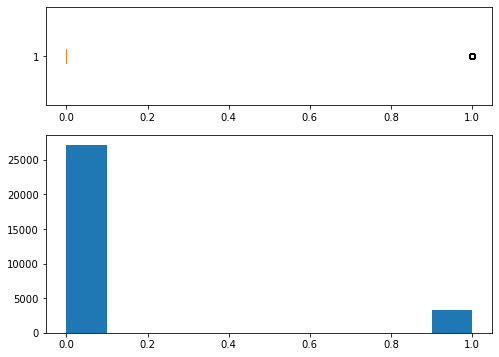

Plotting for columns prev_campaign_contact


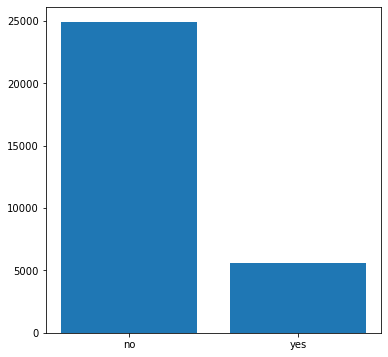

In [31]:
data_cols = train.columns

for col in data_cols[1:]:
    print('Plotting for columns', col)
    if train[col].dtype in ['float64', 'int64']:
        hist_box_col(train[col])
    else:
        bar_col(train[col])

Plotting for columns customer_age


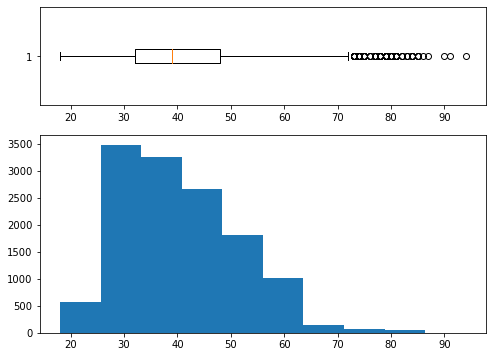

Plotting for columns job_type


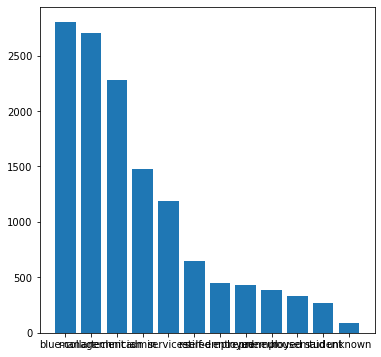

Plotting for columns marital


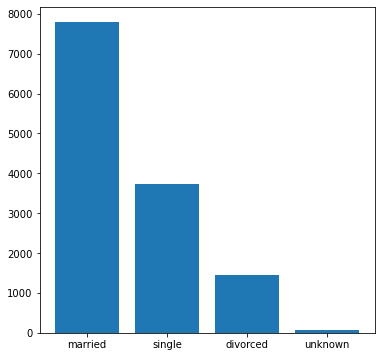

Plotting for columns education


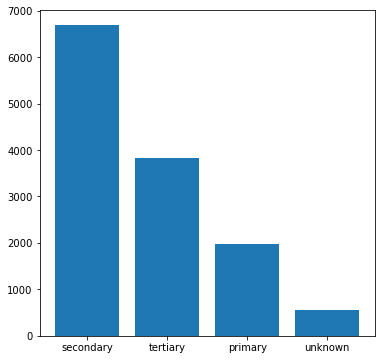

Plotting for columns default


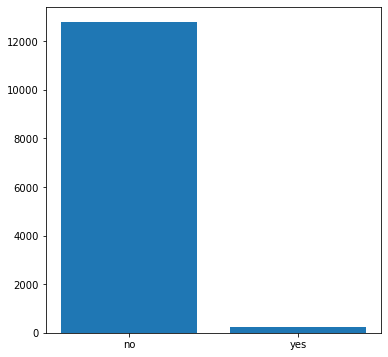

Plotting for columns balance


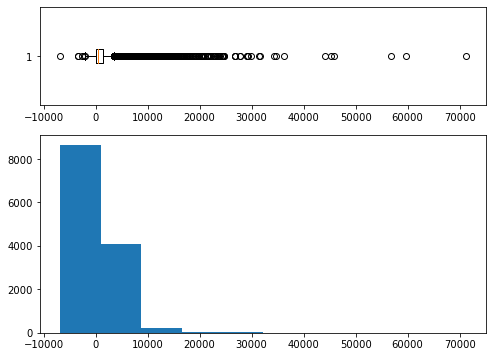

Plotting for columns housing_loan


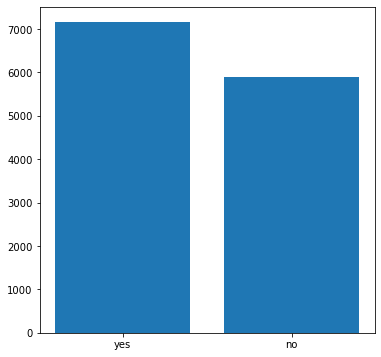

Plotting for columns personal_loan


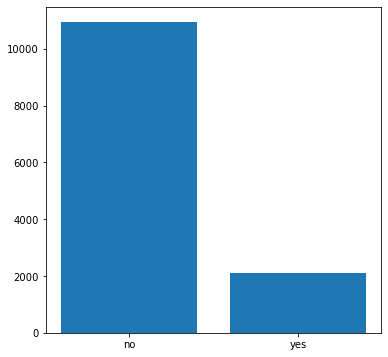

Plotting for columns communication_type


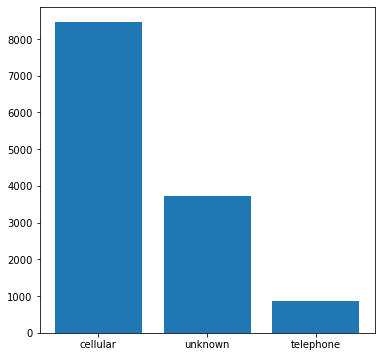

Plotting for columns day_of_month


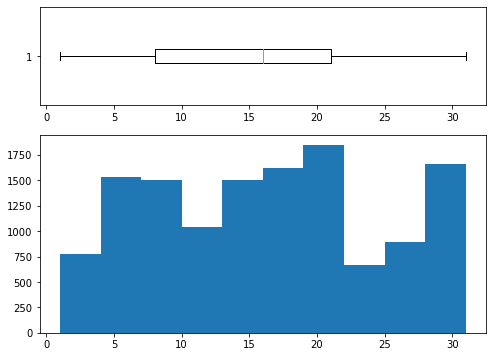

Plotting for columns month


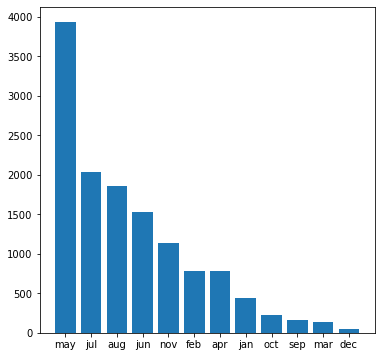

Plotting for columns last_contact_duration


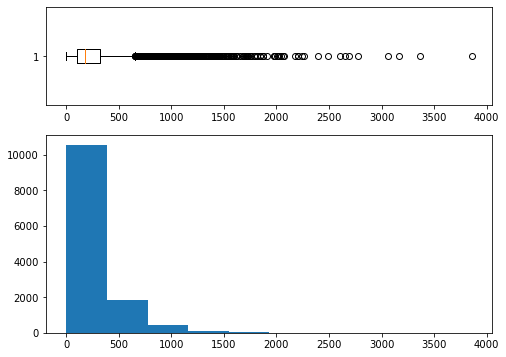

Plotting for columns num_contacts_in_campaign


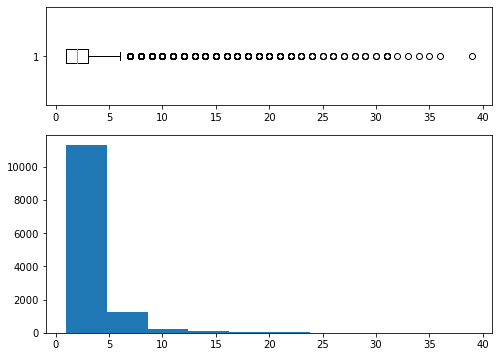

Plotting for columns num_contacts_prev_campaign


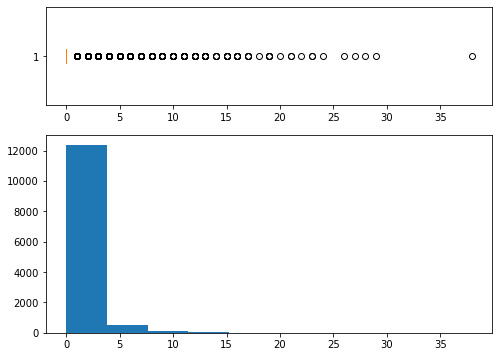

Plotting for columns prev_campaign_outcome


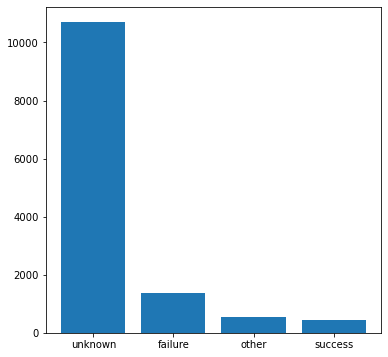

Plotting for columns prev_campaign_contact


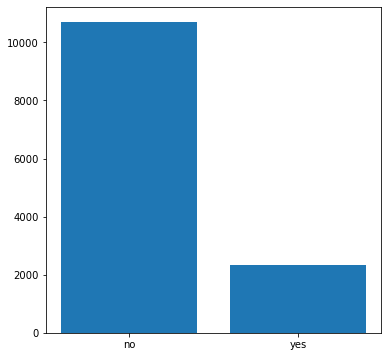

In [32]:
data_cols = test.columns

for col in data_cols[1:]:
    print('Plotting for columns', col)
    if test[col].dtype in ['float64', 'int64']:
        hist_box_col(test[col])
    else:
        bar_col(test[col])

In [33]:
data_cols

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'prev_campaign_contact'],
      dtype='object')

*Observations for train* - 
1. Balance - needs transformation
2. Last contact duration - needs transformation
3. Number of contacts in campaign - needs transformation
4. Number of contacts in previous campaign - needs transformation
5. Number of contacts in previous campaign - have one outlier with value > 250 while every other under entry is under 100
6. Rest all categorical variables doesn't have highly skewed distribution

*Observation for test* -

Same as train, no outlier identified based on distributions

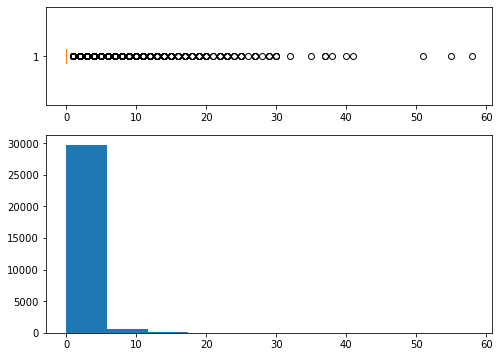

In [34]:
# removing outlier in contacts in prev campaign columns
train = train[train['num_contacts_prev_campaign'] != train['num_contacts_prev_campaign'].max()]

hist_box_col(train['num_contacts_prev_campaign'])

In [35]:
# reseting index
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### Feature engineering - Transformation

Columns for transformation - 
1. Balance - add 10k to the balance and take log transformation, also create another variable to indicate negative balance
2. Last contact duration - log transformation add small numeric value due to 0 entries
3. Number of contacts in campaign - log transformation add small numeric value due to 0 entries
4. Number of contacts in previous campaign - log transformation add small numeric value due to 0 entries

In [36]:
alpha = 0.1

In [37]:
# balance
train['balance_ind'] = np.where(train['balance'] > 0, 'positive', 'negative')
test['balance_ind'] = np.where(test['balance'] > 0, 'positive', 'negative')

base_addn = -min(train['balance'].min(), test['balance'].min()) + alpha

train['log_balance'] = np.log(base_addn + train['balance'])
test['log_balance'] = np.log(base_addn + test['balance'])

Log balance for train


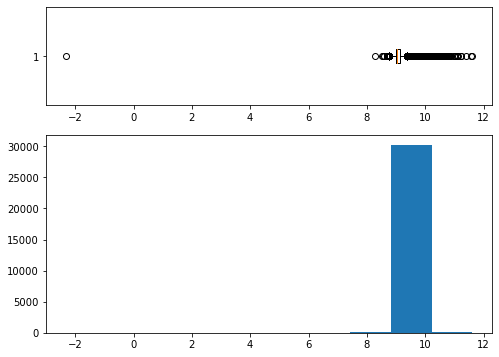

Log balance for test


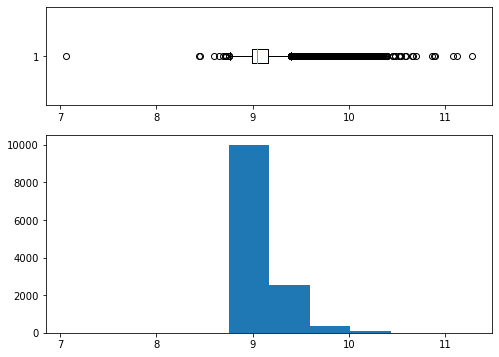

In [38]:
print('Log balance for train')
hist_box_col(train['log_balance'])

print('Log balance for test')
hist_box_col(test['log_balance'])

Negative balance indicator for train


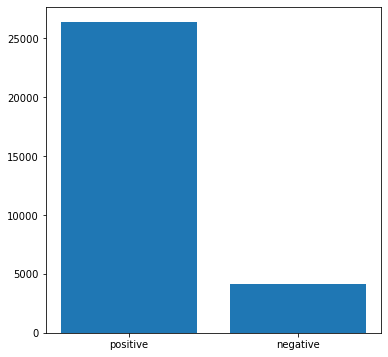

Negative balance indicator for test


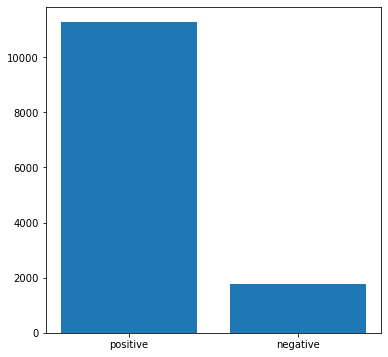

In [39]:
print('Negative balance indicator for train')
bar_col(train['balance_ind'])

print('Negative balance indicator for test')
bar_col(test['balance_ind'])

Log last_contact_duration for train


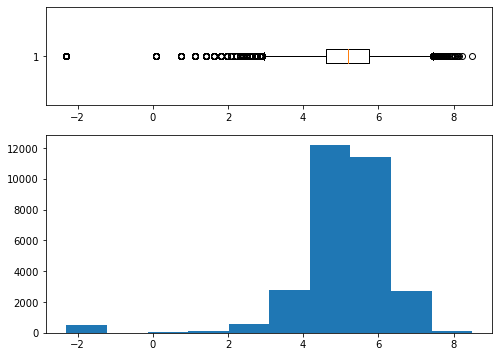

Log last_contact_duration test


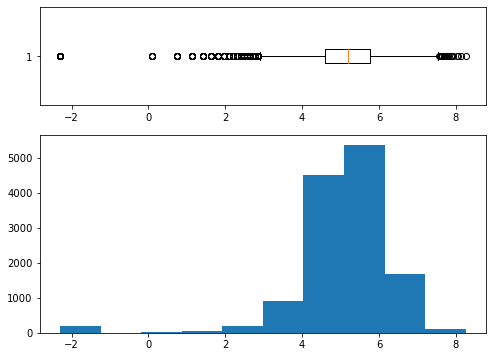

Log num_contacts_in_campaign for train


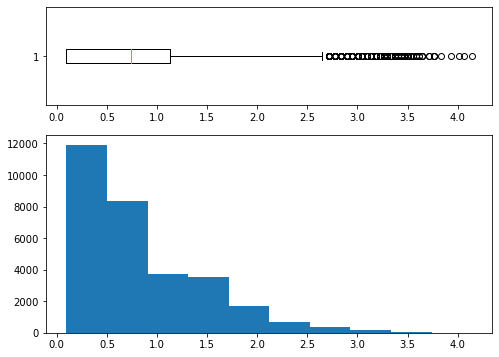

Log num_contacts_in_campaign test


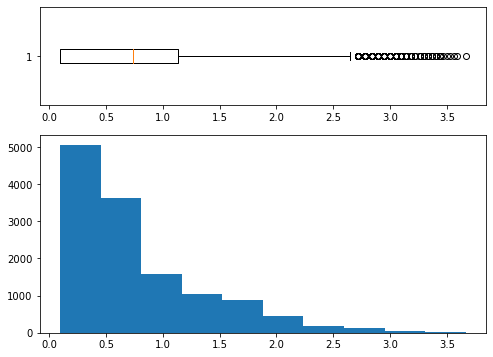

Log num_contacts_prev_campaign for train


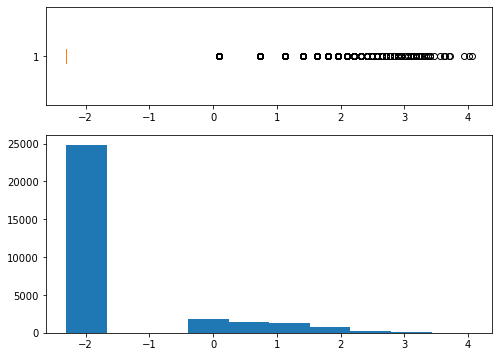

Log num_contacts_prev_campaign test


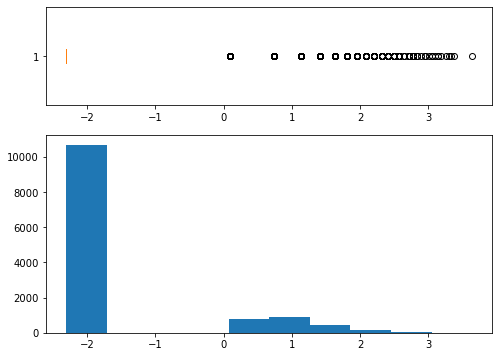

In [40]:
# rest three columns
col_to_transform = ['last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']

for col in col_to_transform:

    train['log_' + col] = np.log(alpha + train[col])
    test['log_' + col] = np.log(alpha + test[col])
    
    print('Log', col, 'for train')
    hist_box_col(train['log_' + col])

    print('Log', col, 'test')
    hist_box_col(test['log_' + col])
    

### Feature engineering - correlations and encoding

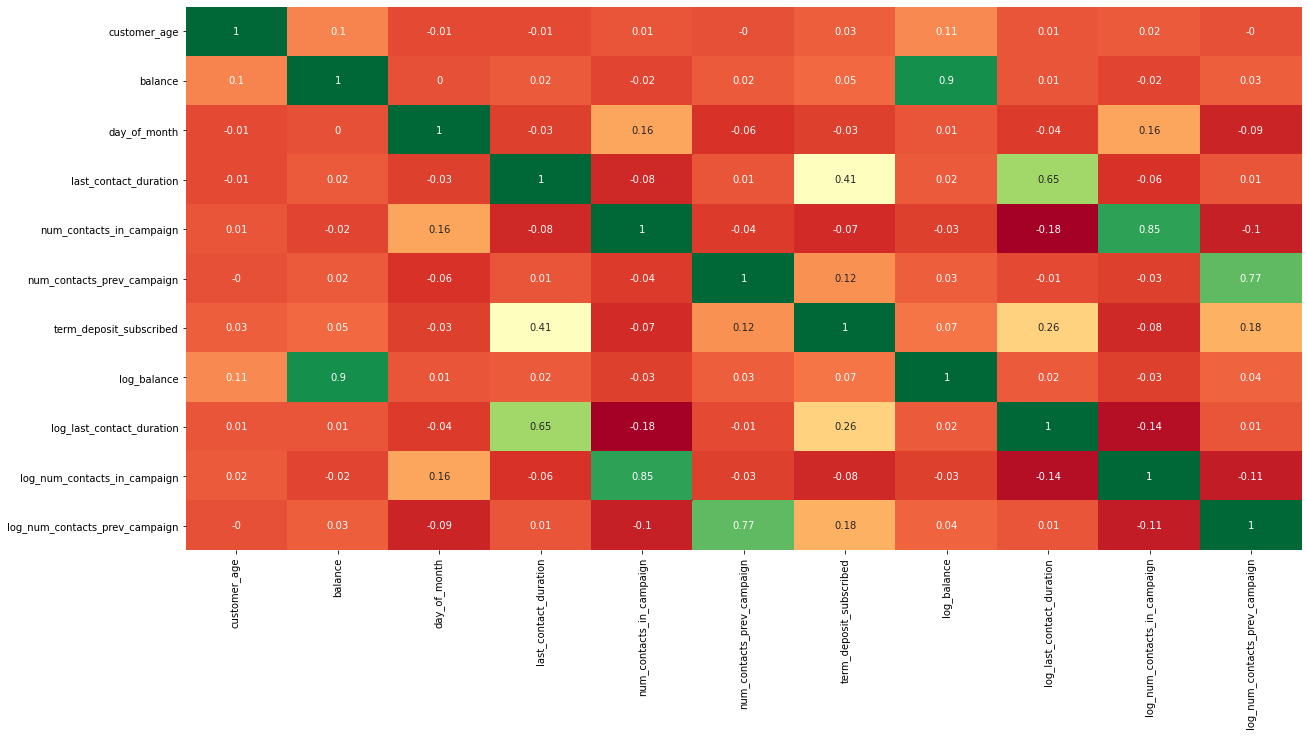

In [41]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(round(train.corr(), 2), cmap='RdYlGn', annot=True, cbar=False)

Correlation is high only for orginal and transformed variables for rest its well below 0.5

Next steps - 
EDA
1. Interesting bi-variate plots

Feature engineering 
1. One hot encoding
2. Cyclicity for days/month

Feature importance
1. Logistic regression - vif
2. Trees variable importance

**Bivariate polts**

In [42]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed',
       'prev_campaign_contact', 'balance_ind', 'log_balance',
       'log_last_contact_duration', 'log_num_contacts_in_campaign',
       'log_num_contacts_prev_campaign'],
      dtype='object')

In [43]:
cols_for_bivariate = ['customer_age', 'job_type', 'marital', 'education',  'default',
       'housing_loan', 'personal_loan', 'communication_type', 
       'prev_campaign_outcome', 'prev_campaign_contact', 'balance_ind', 'log_balance',
       'log_last_contact_duration', 'log_num_contacts_in_campaign',
       'log_num_contacts_prev_campaign']
y_col = 'term_deposit_subscribed'

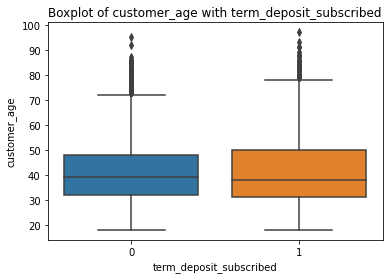

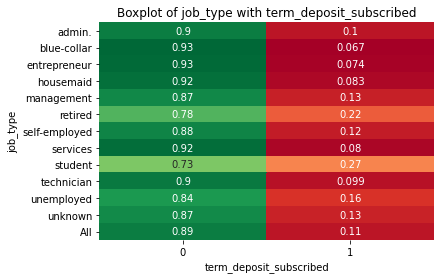

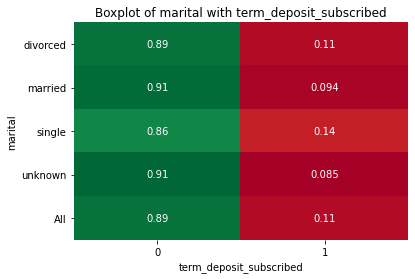

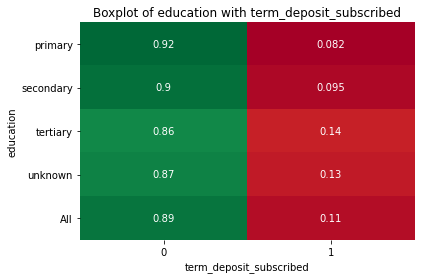

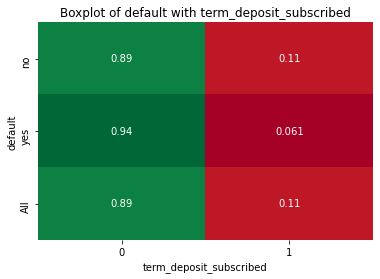

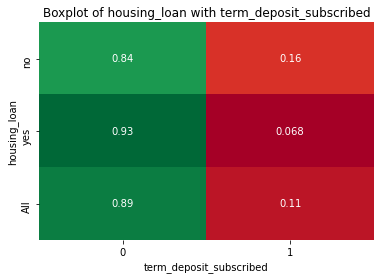

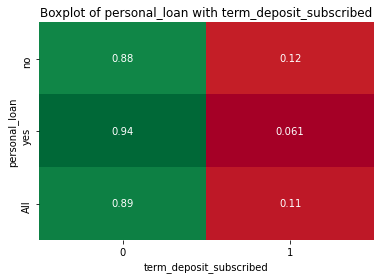

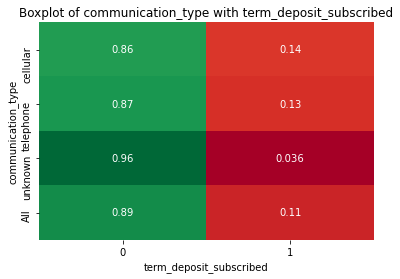

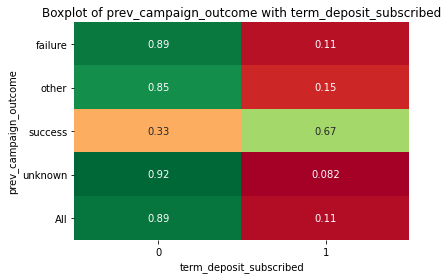

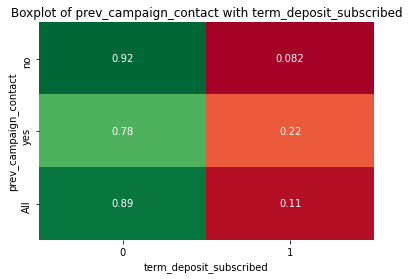

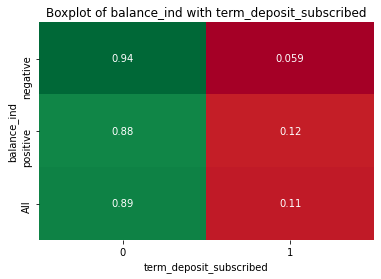

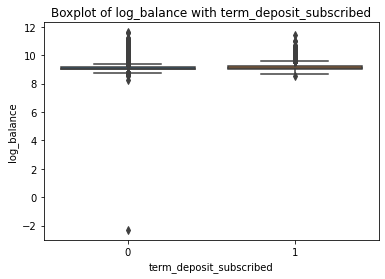

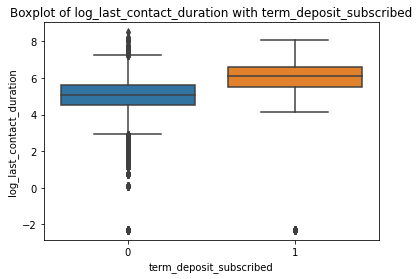

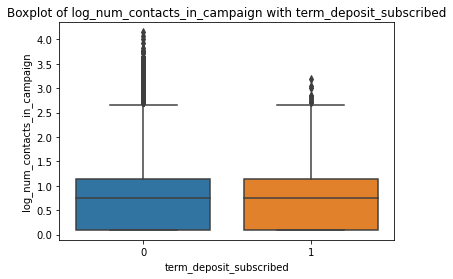

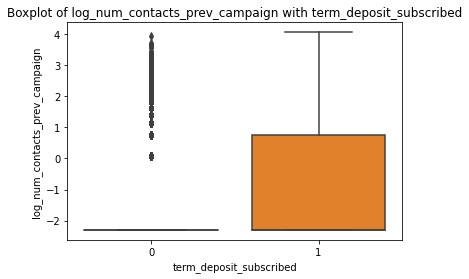

In [44]:
for col in cols_for_bivariate:
    if train[col].dtype in ['float64', 'int64']:
        plt.figure()
        plt.title('Boxplot of ' + col + ' with ' + y_col)
        sns.boxplot(y=train[col], x=train[y_col])
        plt.show()
    else:
        grp = train.pivot_table(index=col, columns=y_col, values='id', aggfunc='count', margins='True')
        grp[0] /= grp['All']
        grp[1] /= grp['All']
        plt.figure()
        plt.title('Boxplot of ' + col + ' with ' + y_col)
        sns.heatmap(grp[[0, 1]], cmap='RdYlGn', annot=True, cbar=False)
        plt.show()

*Insights*

1. Job type - retired, student are more likely to do term deposit after campaign
2. Education - primary & secondary are less likely to do term deposit after campaign
3. Default - default is yes then less likely to do term deposit after campaign
4. Housing loan - With loan less likely, with no loan more likely
5. Personal loan - With loan less likely, with no loan more likely
6. Communication type - Unknown are less likely 
7. Previous campaign - if previous campaign is a success then it highly likely to do term deposit
8. Previous campaign contact - if contacted in a previous campaign then it more likely to do term deposit
9. Balance - if balance is negative then very low chances to do term deposit
10. Last contact duration - higher the duration of last contact then it is more likely to do term deposit


**Feature engineering**

In [45]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

# getting categorical/numeric features for OHE
cat_cols = [col for col in cols_for_bivariate if train[col].dtype == 'object']
num_cols = [col for col in cols_for_bivariate if train[col].dtype != 'object']
ohe.fit(train[cat_cols])

# transforming ohe in train and test
train_t = pd.concat([
    pd.DataFrame(ohe.transform(train[cat_cols]).toarray(), columns=ohe.get_feature_names_out()),
    train[num_cols]], 
    axis=1)
train_t[y_col] = train[y_col]

test_t = pd.concat([
    pd.DataFrame(ohe.transform(test[cat_cols]).toarray(), columns=ohe.get_feature_names_out()),
    test[num_cols]], 
    axis=1)

# assertion check
assert train_t.isna().sum().sum() == 0
assert test_t.isna().sum().sum() == 0

In [46]:
train_t.head()

,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,...,prev_campaign_outcome_success,prev_campaign_outcome_unknown,prev_campaign_contact_yes,balance_ind_positive,customer_age,log_balance,log_last_contact_duration,log_num_contacts_in_campaign,log_num_contacts_prev_campaign,term_deposit_subscribed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,28.0,9.024625,5.714063,1.410987,-2.302585,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,34.0,9.099867,4.963544,0.741937,0.095310,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,46.0,9.068327,4.616110,1.410987,-2.302585,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,34.0,8.989956,4.844974,1.131402,-2.302585,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,41.0,9.145492,3.893859,0.741937,-2.302585,0


In [47]:
# cyclicity
train_t['month'] = train['month'].map(lambda m: datetime.datetime.strptime(m, "%b")).dt.month
train_t['month_sin'] = np.sin(2 * np.pi * train_t['month']/12)
train_t['month_cos'] = np.cos(2 * np.pi * train_t['month']/12)

train_t['day_of_month'] = train['day_of_month']
train_t['day_of_month_sin'] = np.sin(2 * np.pi * train_t['day_of_month']/
       train_t['month'].map(lambda m: monthrange(2019, m)[1]))
train_t['day_of_month_cos'] = np.cos(2 * np.pi * train_t['day_of_month']/
       train_t['month'].map(lambda m: monthrange(2019, m)[1]))

test_t['month'] = test['month'].map(lambda m: datetime.datetime.strptime(m, "%b")).dt.month
test_t['month_sin'] = np.sin(2 * np.pi * test_t['month']/12)
test_t['month_cos'] = np.cos(2 * np.pi * test_t['month']/12)

test_t['day_of_month'] = test['day_of_month']
test_t['day_of_month_sin'] = np.sin(2 * np.pi * test_t['day_of_month']/
       test_t['month'].map(lambda m: monthrange(2019, m)[1]))
test_t['day_of_month_cos'] = np.cos(2 * np.pi * test_t['day_of_month']/
       test_t['month'].map(lambda m: monthrange(2019, m)[1]))

In [48]:
train_t.shape, test_t.shape

((30490, 39), (13043, 38))

In [49]:
train_t.head()

,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,...,log_last_contact_duration,log_num_contacts_in_campaign,log_num_contacts_prev_campaign,term_deposit_subscribed,month,month_sin,month_cos,day_of_month,day_of_month_sin,day_of_month_cos
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.714063,1.410987,-2.302585,0,6,1.224647e-16,-1.000000,26,-0.743145,0.669131
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.963544,0.741937,0.095310,0,11,-5.000000e-01,0.866025,18,-0.587785,-0.809017
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.616110,1.410987,-2.302585,0,2,8.660254e-01,0.500000,5,0.900969,0.433884
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.844974,1.131402,-2.302585,0,5,5.000000e-01,-0.866025,20,-0.790776,-0.612106
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.893859,0.741937,-2.302585,0,5,5.000000e-01,-0.866025,13,0.485302,-0.874347


**Feature importance**

In [50]:
# VIF dataframe
vif_data = pd.DataFrame()
train_cols = [col for col in train_t.columns if col != 'term_deposit_subscribed']
vif_data['feature'] = train_cols
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(train_t.values, i)
                          for i in range(len(train_cols))]
vif_data.sort_values('VIF', ascending=False, inplace=True)

In [51]:
# fitting random forest to know the variable importance
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
X_train = train_t[[col for col in train_t.columns if col != 'term_deposit_subscribed']]
y_train = train_t['term_deposit_subscribed']

forest.fit(X_train, y_train)
feature_imp = forest.feature_importances_

forest_feat_imp = pd.DataFrame()
forest_feat_imp['feature'] = X_train.columns
forest_feat_imp['feature_importance'] = feature_imp
forest_feat_imp.sort_values('feature_importance', ascending=True, inplace=True)

<AxesSubplot:ylabel='feature'>

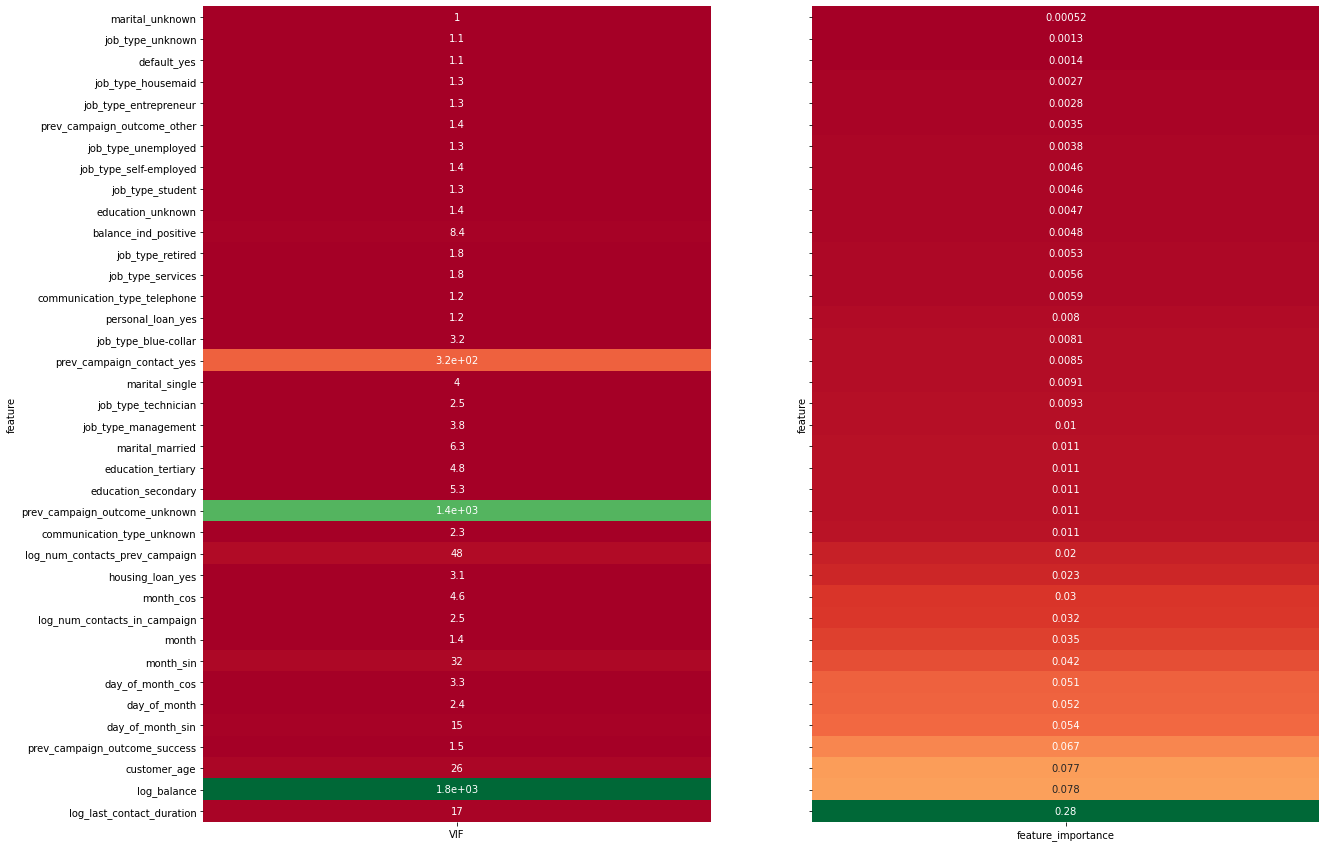

In [52]:
# combining feature importance and vif by normalizing
feature_imp = forest_feat_imp.merge(vif_data, on='feature', how='outer')
feature_imp.set_index('feature', inplace=True)

f, ax = plt.subplots(ncols=2, figsize=(20, 15), sharey=True)
sns.heatmap(feature_imp[['VIF']], cmap='RdYlGn', annot=True, cbar=False, ax=ax[0])
sns.heatmap(feature_imp[['feature_importance']], cmap='RdYlGn', annot=True, cbar=False, ax=ax[1])

### Dataset for model

In [53]:
# adding the categorical features back and modeling will be done both in R and Python
# R for hierarchical models
train_t['job_type'] = train['job_type']
train_t['marital'] = train['marital']
train_t['education'] = train['education']
train_t['default'] = train['default']
train_t['housing_loan'] = train['housing_loan']
train_t['personal_loan'] = train['personal_loan']
train_t['communication_type'] = train['communication_type']
train_t['prev_campaign_outcome'] = train['prev_campaign_outcome']
train_t['prev_campaign_contact'] = train['prev_campaign_contact']
train_t['balance'] = train['balance']
train_t['last_contact_duration'] = train['last_contact_duration']
train_t['num_contacts_in_campaign'] = train['num_contacts_in_campaign']
train_t['num_contacts_prev_campaign'] = train['num_contacts_prev_campaign']

test_t['job_type'] = test['job_type']
test_t['marital'] = test['marital']
test_t['education'] = test['education']
test_t['default'] = test['default']
test_t['housing_loan'] = test['housing_loan']
test_t['personal_loan'] = test['personal_loan']
test_t['communication_type'] = test['communication_type']
test_t['prev_campaign_outcome'] = test['prev_campaign_outcome']
test_t['prev_campaign_contact'] = test['prev_campaign_contact']
test_t['balance'] = test['balance']
test_t['last_contact_duration'] = test['last_contact_duration']
test_t['num_contacts_in_campaign'] = test['num_contacts_in_campaign']
test_t['num_contacts_prev_campaign'] = test['num_contacts_prev_campaign']

In [54]:
train_t.shape, test_t.shape

((30490, 52), (13043, 51))

In [55]:
# train_t.to_csv('../data/train_transformed.csv', index=False)
# test_t.to_csv('../data/test_transformed.csv', index=False)

In [67]:
# dividing the dataset into train and validations set - 80% & 20%
idx = np.random.choice(train_t.index, replace=False, size=int(0.2*len(train_t)))
final_train = train_t[~train_t.index.isin(idx)]
final_test = train_t.iloc[idx]
print(final_train.shape, final_test.shape)

final_train.to_csv('../data/train_transformed.csv', index=False)
final_test.to_csv('../data/test_transformed.csv', index=False)

(24392, 52) (6098, 52)


### Possible models for Random effects model
**1. Baseline**

term_deposit_subscribed ~ job_type + marital + education + default + housing_loan + personal_loan + communication_type +
prev_campaign_outcome + prev_campaign_contact + balance + last_contact_duration + num_contacts_in_campaign + num_contacts_prev_campaign + month + day_of_month + customer_age

**2. Transformed variables - balance indicator and log transformed**

term_deposit_subscribed ~ job_type + marital + education + default + housing_loan + personal_loan + communication_type +
prev_campaign_outcome + prev_campaign_contact + balance_ind + log_balance + log_last_contact_duration + log_num_contacts_in_campaign + log_num_contacts_prev_campaign + month + day_of_month + customer_age

**3. Adding Cyclicity**

term_deposit_subscribed ~ job_type + marital + education + default + housing_loan + personal_loan + communication_type +
prev_campaign_outcome + prev_campaign_contact + balance_ind + log_balance + log_last_contact_duration + log_num_contacts_in_campaign + log_num_contacts_prev_campaign + month_sin + month_cos + day_of_month_sin + day_of_month_cos + customer_age

**4. (i) Adding random effects - job_type**

term_deposit_subscribed ~ marital + education + default + housing_loan + personal_loan + communication_type +
prev_campaign_outcome + prev_campaign_contact + balance_ind + log_balance + log_last_contact_duration + log_num_contacts_in_campaign + log_num_contacts_prev_campaign + month_sin + month_cos + day_of_month_sin + day_of_month_cos + customer_age | job_type

**4. (ii) Adding random effects - marital**

term_deposit_subscribed ~ job_type + education + default + housing_loan + personal_loan + communication_type +
prev_campaign_outcome + prev_campaign_contact + balance_ind + log_balance + log_last_contact_duration + log_num_contacts_in_campaign + log_num_contacts_prev_campaign + month_sin + month_cos + day_of_month_sin + day_of_month_cos + customer_age | marital

**4. (iii) Adding random effects - education**

term_deposit_subscribed ~ job_type + marital + default + housing_loan + personal_loan + communication_type +
prev_campaign_outcome + prev_campaign_contact + balance_ind + log_balance + log_last_contact_duration + log_num_contacts_in_campaign + log_num_contacts_prev_campaign + month_sin + month_cos + day_of_month_sin + day_of_month_cos + customer_age | education

**5. Adding multiple random effects**

Will be dependent on the outcome of the models created in 4. Most likely a combination of the three features - job_type, marital & education